In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

First, let's define some functions. The first 4 will decide if we are on an edge, and the last one will create the list of neighbors.

In [2]:
def on_bottom_edge(i, rows, columns):
    if float(i) / columns < 1:
        return True
    return False

def on_left_edge(i, rows, columns):
    if float(i) % columns == 0:
        return True
    return False

def on_right_edge(i, rows, columns):
    if float(i) % columns == columns - 1:
        return True
    return False

def on_top_edge(i, rows, columns):
    if float(i) / columns >= rows - 1:
        return True
    return False
    
def build_neighbor_list(rows, columns):
    neighbors = []
    n_squares = rows * columns
    for square in range(n_squares):
        if on_bottom_edge(square, rows, columns):
            bottom = square
        else:
            bottom = square - columns
        if on_right_edge(square, rows, columns):
            right = square
        else:
            right = square + 1
        if on_left_edge(square, rows, columns):
            left = square
        else:
            left = square - 1
        if on_top_edge(square, rows, columns):
            top = square
        else:
            top = square + columns
        neighbors.append([right, top, left, bottom])
    return neighbors

Now, let's define a function to initialize and fill in the transition matrix based on size of the game we want to play.

In [3]:
def build_transition_matrix(rows, columns):
    neighbors = build_neighbor_list(rows, columns)
    transition_matrix = np.zeros((rows * columns, rows * columns))
    for i in range(rows * columns):
        for neighbor in range(4):  # we always have 4 neighbors
            transition_matrix[neighbors[i][neighbor], i] += 0.25
    return transition_matrix




Now find the equilibrium probability vector, which is the eigenvector of the transfer matrix with eigenvalue 1.

Use `np.where` to find where the eigenvalue is (very close to) 1, and then the eigenvector associated with that eigenvalue is just `eigenvectors[:, eigenvalue_1]`

Note that we have to normalize the equilibrium probability vector.

Let's also use what we know about the different eigenvalues to calculate the correlation time.

In [4]:
rows, columns = 4, 4
transition_matrix = build_transition_matrix(rows, columns)
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
eigenvalues, eigenvectors = eigenvalues.real, eigenvectors.real
eigenvalue_1 = np.where(np.abs(np.abs(eigenvalues) - 1.0) < 1e-8)[0][0]

print eigenvectors[:, eigenvalue_1] / sum(eigenvectors[:, eigenvalue_1])

t_corr = -1/np.log(np.unique(eigenvalues)[::-1][1])
print 'Correlation time = {:.2f}'.format(t_corr)

[ 0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625
  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625  0.0625]
Correlation time = 6.32


Now, let's plot and the probability of the pebble being in each square as a function of time. On the same plot, let's plot the expected equilibrium value and vertical lines on integer multiples of the correlation time.

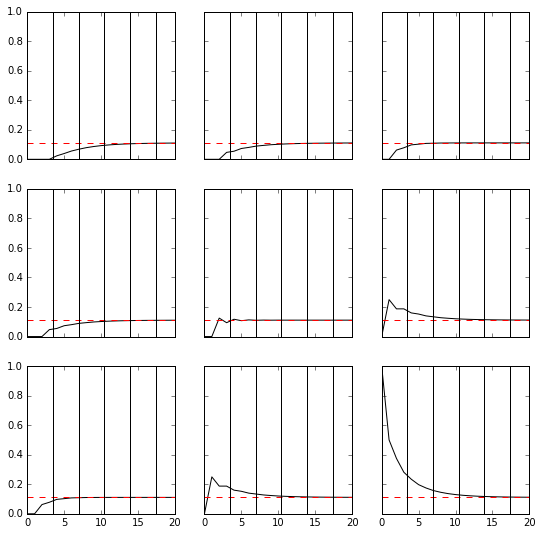

In [50]:
# empty list for positions through time
positions_t = []

# positions at time 0 (start at top right square)
position = np.zeros(rows * columns)
position[-1] = 1

# now loop through time and find the probability vector at time t
for step in range(int(np.ceil(6*t_corr))):
    # print position
    positions_t.append(position)
    position = np.dot(transition_matrix, position)
positions_t = np.asarray(positions_t)
fig, axs = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True)
fig.set_size_inches(3*rows, 3*columns)
for ax, p_square_t in zip(axs.flatten(), positions_t.T):
    ax.plot(p_square_t[:int(np.ceil(6*t_corr))], 'k')
    ax.axhline(1.0/(rows*columns), c='r', ls='--')
    for i in range(5):
        ax.axvline(t_corr * (i+1), c='k')